In [31]:

import pandas as pd
import json
from sklearn.cluster import KMeans, DBSCAN
from sklearn.utils import shuffle
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.datasets import load_files
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn import metrics
import matplotlib.pyplot as plt
import nbimporter
#%run part1_data_collection.ipynb
from part1_data_analysis import extract_after_last_slash
import re
#%run part1_data_analysis.ipynb


## K-MEANS ###################

## Text input ###############

In [76]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,"Amâncio d'Alpoim Miranda ""Pancho"" Guedes (Lisb...",1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Georges Adéagbo (born 1942) is a Beninese scul...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,Jose Emilio Fuentes Fonseca (JEFF) is an artis...,1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [77]:
df_cluster.shape

(260, 2)

In [78]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [79]:
df_cluster = shuffle(df_cluster)
# df_cluster.reset_index(drop=True, inplace=True)
df_cluster.head(20)

,text,category
174,New York City has been called the media capita...,0
210,"Omar Rayo Reyes (January 20, 1928 – June 7, 20...",1
226,Kudjoe Affutu (born 1985) is a Ghanaian artist...,1
5,Frano Menegello Dinčić also spelled Frano Mene...,1
34,"Juan José Calandria (December 12, 1902 – July ...",1
167,Mkrtich Avetisi Avetisian (Armenian: Մկրտիչ Ավ...,0
84,José Franco (24 March 1931 – 9 May 2022) was a...,0
22,John Howard Clark (15 January 1830 – 20 May 18...,0
234,Carlos Mauricio Funes Cartagena (born 18 Octob...,0
64,Efiaimbalo (c. 1925 – 2006) was a Malagasy scu...,1


In [80]:
X = df_cluster['text']
Y = df_cluster['category']

In [81]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800 -1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=1200, 
                                       use_idf=True,
                                       stop_words='english')
                                       
                                      

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)





In [82]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['000' '10' '100' ... 'younger' 'youth' 'ик']


In [83]:

km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(tfidf_matrix)

# Get cluster assignments for the data
predicted_labels = km.labels_
clusters = predicted_labels.tolist()


print(predicted_labels[0:20])


[1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0]


In [84]:
texts = df_cluster['text'].values
labels = df_cluster['category'].values

data = {'text':texts,'category':labels,'cluster':clusters}
df_cluster = pd.DataFrame(data,columns=['text','category','cluster'])
#df_cluster.head(40)

In [85]:
# Print out number of items per clusters
df_cluster['cluster'].value_counts()

cluster
1    142
0    118
Name: count, dtype: int64

In [86]:
print("Top terms per cluster:")
true_k = np.unique(km.labels_).shape[0]
print("True number of clusters: ", true_k)

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

# for each cluster
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    # print tokens of clusters centroids (TF-IDF decreasing values)
    for ind in order_centroids[i, :10]:  # Adjust the number here to display more or fewer terms
        print(' %s' % features[ind], end='')
    print('\n')


Top terms per cluster:
True number of clusters:  2
Cluster 0: art sculpture museum sculptor work works gallery arts artist new

Cluster 1: editor journalist news newspaper el russian soviet la armenian dominican



In [87]:
from sklearn import metrics
print( labels)
print( km.labels_)

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, km.labels_, sample_size=1000))

print()


[0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1]
[1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 0 0 0 0 1 1 0 1 1 

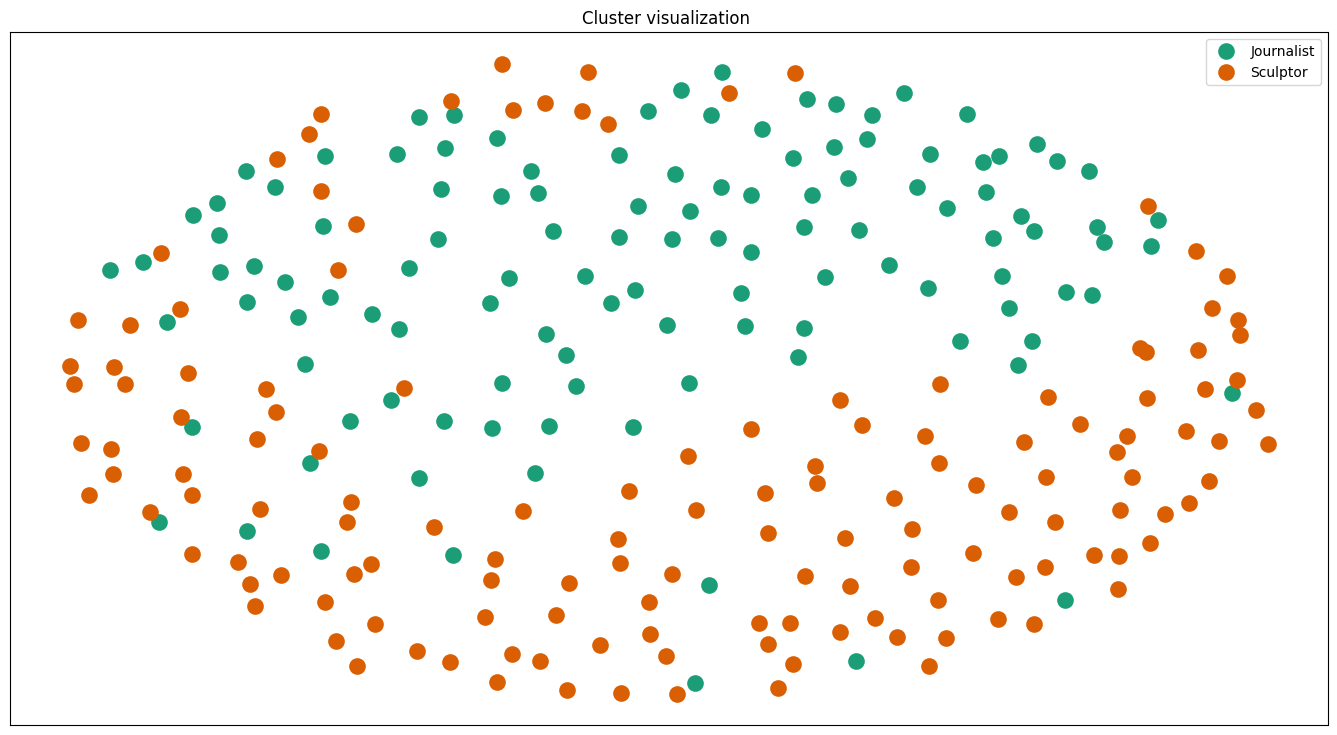

In [88]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
#cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG graph input  

In [138]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [140]:
# Prepare data for clustering

category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster
#df_cluster.to_csv('df_cluster.csv', sep=",", encoding="utf-8")



,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
256,Luis_Ramacciotti subject Category:Year_of_deat...,1
257,Omar_Rayo wikiPageWikiLink Latin_American_art....,1
258,Mikhail_Reva wikiPageExternalLink revastudio.o...,1


In [141]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [142]:
# Shuffle and split the data
df_cluster = shuffle(df_cluster)


In [143]:
X = df_cluster['text']
Y = df_cluster['category']

In [144]:
# Using TFIDF vectorizer to convert convert words to Vector Space
# max_features = 800-1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=800, 
                                       use_idf=True,
                                       stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(X)




In [145]:
features = tfidf_vectorizer.get_feature_names_out()
print(features)


['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '1883' '1888' '1898' '19' '1900' '1910' '1913' '1918'
 '1919' '1924' '1925' '1928' '1935' '1936' '1937' '1941' '1942' '1944'
 '1945' '1949' '1952' '1953' '1954' '1957' '1958' '1959' '1960' '1965'
 '1967' '1968' '1971' '1974' '1977' '1985' '1986' '1989' '19th' '20'
 '2002' '2005' '2006' '2008' '2009' '2010' '2010_deaths' '2011' '2012'
 '2013' '2014' '2015' '2016' '2017' '2019' '2020' '20th' '21' '21st' '22'
 '23' '24' '25' '26' '27' '28' '30' '300' '_arkadyevich_ureklyan'
 '_california' '_chop' '_echeverría' '_fernández' '_halpine' '_morecambe'
 '_r' '_ralph_casimir' '_roberto_eisenmann_jr'
 '_the_association_of_lgbtq_journalists' 'a_mighty_heart' 'a_reporter'
 'abdelkader_bensalah' 'abstract' 'active' 'activist' 'actor'
 'adebisi_akanji' 'africa' 'african' 'age' 'agim_rada' 'agustín_cárdenas'
 'agustín_fernández_' 'ahron_ben' 'aires' 'al' 'albert_m' 'alberto'
 'alberto_bautista_gómez' 'alberto_c

In [146]:

# Initialize and fit KMeans algorithm
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0, random_state=42)
km.fit(tfidf_matrix)

# Get cluster assignments for the training data
predicted_labels = km.labels_
clusters = predicted_labels.tolist()


print(predicted_labels[0:20])


[1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0]


In [147]:
texts = df_cluster['text'].values
labels = df_cluster['category'].values

data = {'text':texts,'category':labels,'cluster':clusters}
df_cluster = pd.DataFrame(data,columns=['text','category','cluster'])

In [148]:
#print( labels)
#print( km.labels_)

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, km.labels_))

print()

Supervised metrics:
Homogeneity: 0.084
Completeness: 0.084
V-measure: 0.084
Adjusted Rand-Index: 0.111
Unsupervised metric:
Silhouette Coefficient: 0.001



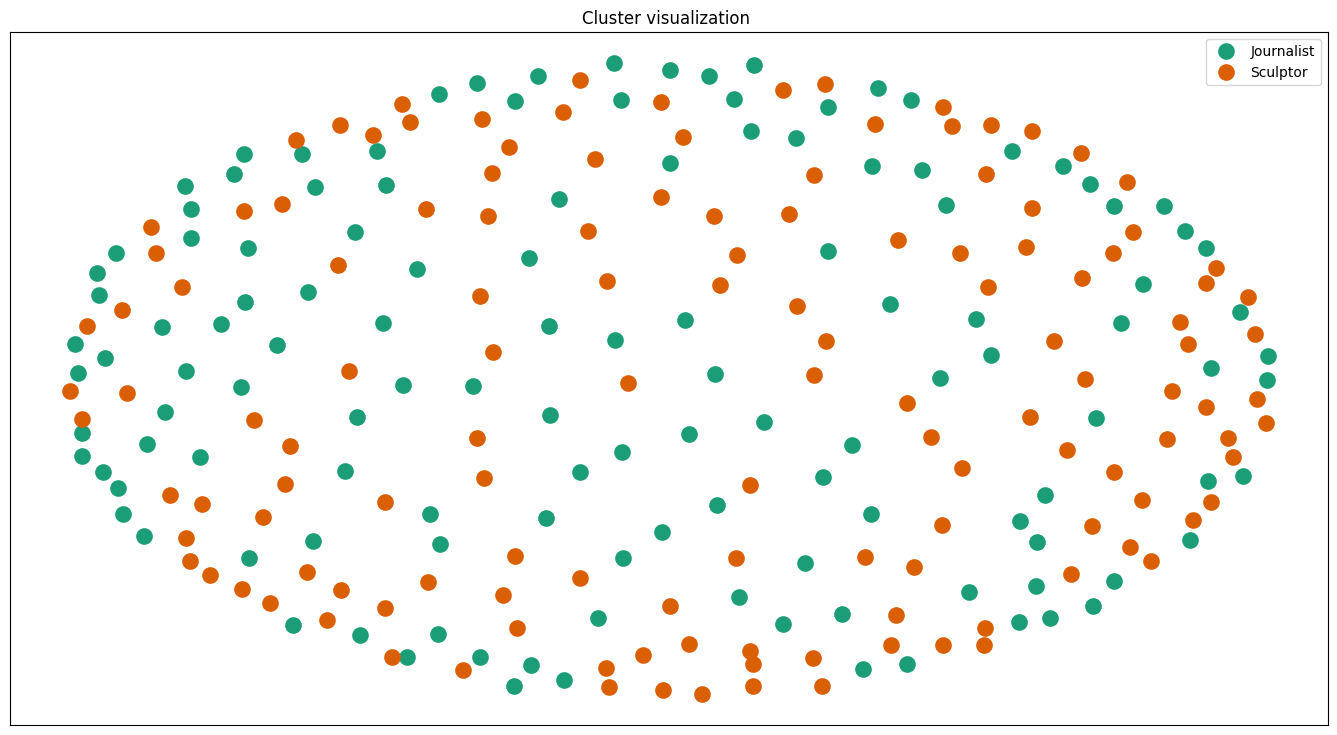

In [149]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## DBSCAN #####

## Text input ####

In [113]:
# load the files and extract the text and category in a dataframe
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
    'category': data_cluster['target']})
df_cluster

,text,category
0,"Amâncio d'Alpoim Miranda ""Pancho"" Guedes (Lisb...",1
1,Scott Robinson is a fictional character from t...,0
2,Ricardo Breceda is an artist most well known f...,1
3,"Luis Aranberri (born 1945 in Eibar), better kn...",0
4,Georges Adéagbo (born 1942) is a Beninese scul...,1
...,...,...
255,"Kayode Akintemi (born June 26, 1965) is a Nige...",0
256,Jose Emilio Fuentes Fonseca (JEFF) is an artis...,1
257,"Thomas Henry Shadwell Clerke, KH (1792–1849), ...",0
258,Hopewell Rugoho-Chin'ono is a Zimbabwean journ...,0


In [114]:
bio = df_cluster["text"]


In [115]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, use_idf=True, stop_words='english')

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)



In [116]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(tfidf_matrix)

cluster_labels = dbscan.fit_predict(tfidf_matrix.toarray())
labels = df_cluster["category"].values



In [117]:
no_clusters = len(np.unique(cluster_labels))
no_noise = np.sum(np.array(cluster_labels) == -1)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print(cluster_labels)

Estimated no. of clusters: 2
Estimated no. of noise points: 82
[-1 -1 -1 -1 -1  0  0 -1  0  0  0 -1  0  0 -1  0 -1 -1  0  0  0  0 -1  0
  0  0 -1  0 -1 -1 -1  0  0  0 -1  0 -1  0 -1 -1  0 -1  0 -1  0  0  0  0
  0 -1  0 -1 -1  0  0  0 -1  0  0  0 -1  0  0  0  0 -1 -1  0 -1 -1  0  0
  0 -1 -1  0  0  0 -1  0  0  0 -1  0  0 -1  0 -1  0  0  0  0  0 -1  0 -1
  0 -1 -1  0  0  0  0 -1 -1  0 -1  0 -1  0  0  0  0  0 -1  0  0 -1  0  0
  0  0  0  0 -1  0  0 -1 -1  0  0  0 -1  0  0  0  0 -1 -1  0  0  0  0 -1
 -1  0  0  0  0 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1  0  0 -1  0
  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0
 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0  0
  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1  0  0  0 -1 -1
 -1  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0  0  0  0]


In [118]:
print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.001
Completeness: 0.001
V-measure: 0.001
Adjusted Rand-Index: -0.002
Unsupervised metric:
Silhouette Coefficient: -0.000



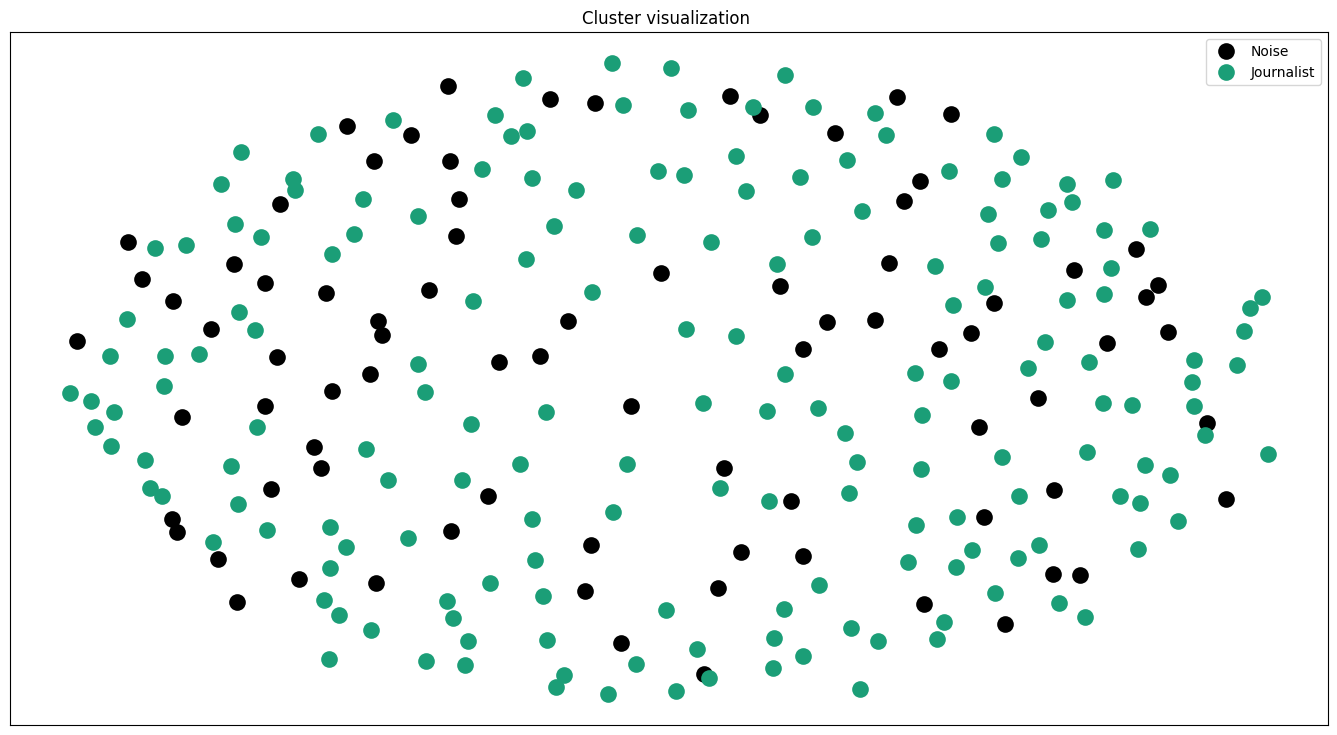

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', -1: '#000000' }

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor', -1 : 'Noise'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=cluster_labels))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG graph input ###

In [158]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [159]:
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster

,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
256,Luis_Ramacciotti subject Category:Year_of_deat...,1
257,Omar_Rayo wikiPageWikiLink Latin_American_art....,1
258,Mikhail_Reva wikiPageExternalLink revastudio.o...,1


In [160]:
print(df_cluster.groupby('category').size())

category
0    130
1    130
dtype: int64


In [161]:
bio = df_cluster['text']

In [189]:
tfidf_vectorizer = TfidfVectorizer(max_features=700, 
                                       use_idf=True,
                                       stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)

In [190]:
dbscan = DBSCAN(eps=1.4, min_samples=5)
dbscan.fit(tfidf_matrix)

cluster_labels = dbscan.fit_predict(tfidf_matrix.toarray())
labels = df_cluster["category"].values




In [191]:
no_clusters = len(np.unique(cluster_labels))
no_noise = np.sum(np.array(cluster_labels) == -1)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print(cluster_labels)

Estimated no. of clusters: 3
Estimated no. of noise points: 186
[ 0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1 -1 -1  0  0 -1 -1 -1
  0 -1 -1 -1 -1 -1  1 -1  1  1 -1  0  1 -1  0  0  0 -1 -1 -1 -1  1 -1 -1
  1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1  0 -1  1 -1 -1
 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  0  1 -1 -1  0
  1  1 -1  0 -1 -1 -1  0  1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  0 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1
  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1]


In [192]:
print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels, sample_size=1000))

print()

Supervised metrics:
Homogeneity: 0.099
Completeness: 0.088
V-measure: 0.094
Adjusted Rand-Index: 0.024
Unsupervised metric:
Silhouette Coefficient: -0.000



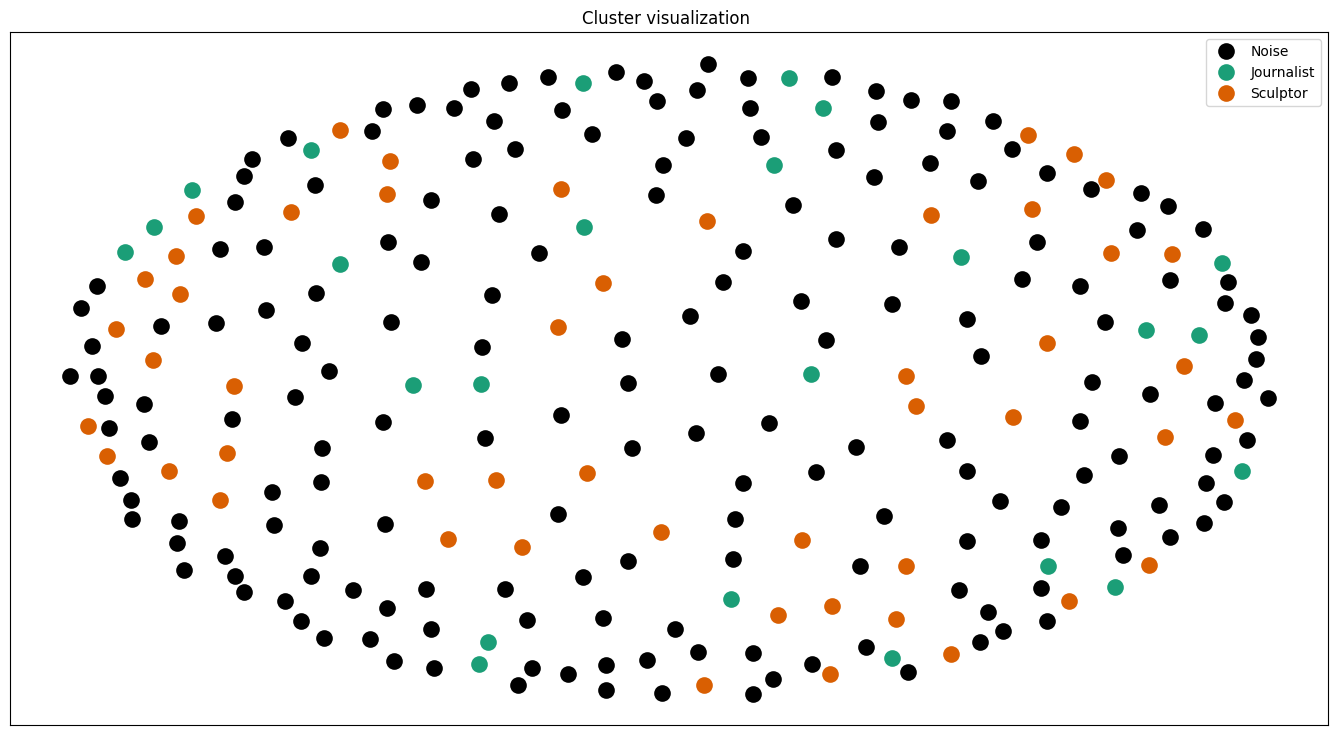

In [193]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', -1: '#000000' }

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor', -1 : 'Noise'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=cluster_labels))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## Agglomerative clustering ######

## Text input #####

In [71]:
from sklearn.cluster import AgglomerativeClustering

# Chargement des données
DATA_DIR = "Biographies/"
data_cluster = load_files(DATA_DIR, encoding='utf-8', decode_error="replace")
df_cluster = pd.DataFrame(
    {'text': data_cluster['data'], 
     'category': data_cluster['target']})



In [72]:
bio = df_cluster["text"]
tfidf_vectorizer = TfidfVectorizer(max_features=700, use_idf=True, stop_words='english')

tfidf_matrix = tfidf_vectorizer.fit_transform(bio)

In [73]:
# configuration of Agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=2)
# apply the clustering
cluster_labels = agg_clust.fit_predict(tfidf_matrix.toarray())

labels = df_cluster['category'].values



In [74]:

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.539
Completeness: 0.541
V-measure: 0.540
Adjusted Rand-Index: 0.639
Unsupervised metric:
Silhouette Coefficient: 0.021



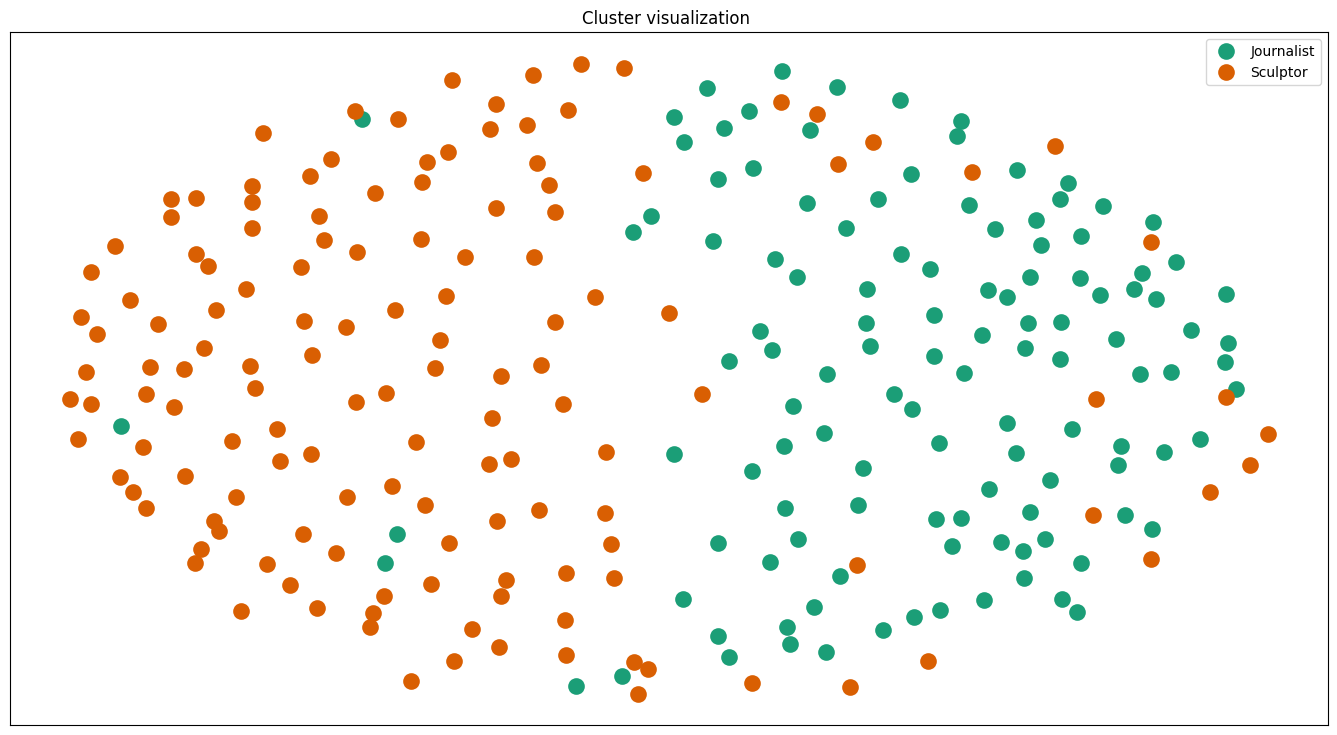

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
#cluster_names = {0: 'Other', 1: 'Chemistry', 2: 'Physics'}
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=agg_clust.labels_.tolist()))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()

## KG graph input ####

In [219]:
# Load JSON data
with open('Biographies/knowledge_graph.json') as file:
    data = json.load(file)

In [220]:
category_mapping = {
    'Journalists': 0,
    'Sculptors': 1
}

entries = []
categories = []

for category, people in data.items():
    for person in people:
        description = ". ".join([
            f"{extract_after_last_slash(str(binding['s']['value']))} {extract_after_last_slash(str(binding['p']['value']))} {extract_after_last_slash(str(binding['o']['value']))}"
            for binding in person['results']['bindings']
        ]) + "."
        entries.append(description)
        categories.append(category_mapping[category])  
        



# Create DataFrame
df_cluster = pd.DataFrame({'text': entries, 'category': categories})
df_cluster

,text,category
0,Perseu_Abramo hypernym Journalist. Wentworth_D...,0
1,Charles_Etienne_Boniface wikiPageWikiLink Supr...,0
2,Charles_Duluth subject Category:Fictional_jour...,0
3,Cindy_Campbell subject Category:Comedy_film_ch...,0
4,Carl_Diggler wikiPageWikiLink Hip_(slang). Car...,0
...,...,...
255,Agim_Rada prov#wasDerivedFrom Agim_Rada?oldid=...,1
256,Luis_Ramacciotti subject Category:Year_of_deat...,1
257,Omar_Rayo wikiPageWikiLink Latin_American_art....,1
258,Mikhail_Reva wikiPageExternalLink revastudio.o...,1


In [221]:
bio = df_cluster["text"]

# max_features = 800-1200 --> best metrics results
tfidf_vectorizer = TfidfVectorizer(max_features=1200, 
                                       use_idf=True,
                                       stop_words='english')
                                       

# Fit the vectorizer to text data
tfidf_matrix = tfidf_vectorizer.fit_transform(bio)



In [224]:
# configuration of Agglomerative clustering
agg_clust = AgglomerativeClustering(n_clusters=2)
# apply the clustering
cluster_labels = agg_clust.fit_predict(tfidf_matrix.toarray())

labels = df_cluster['category'].values


In [225]:

print("Supervised metrics:")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, cluster_labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, cluster_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, cluster_labels))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
print("Unsupervised metric:")
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(tfidf_matrix, cluster_labels))

print()


Supervised metrics:
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: -0.000
Unsupervised metric:
Silhouette Coefficient: 0.001



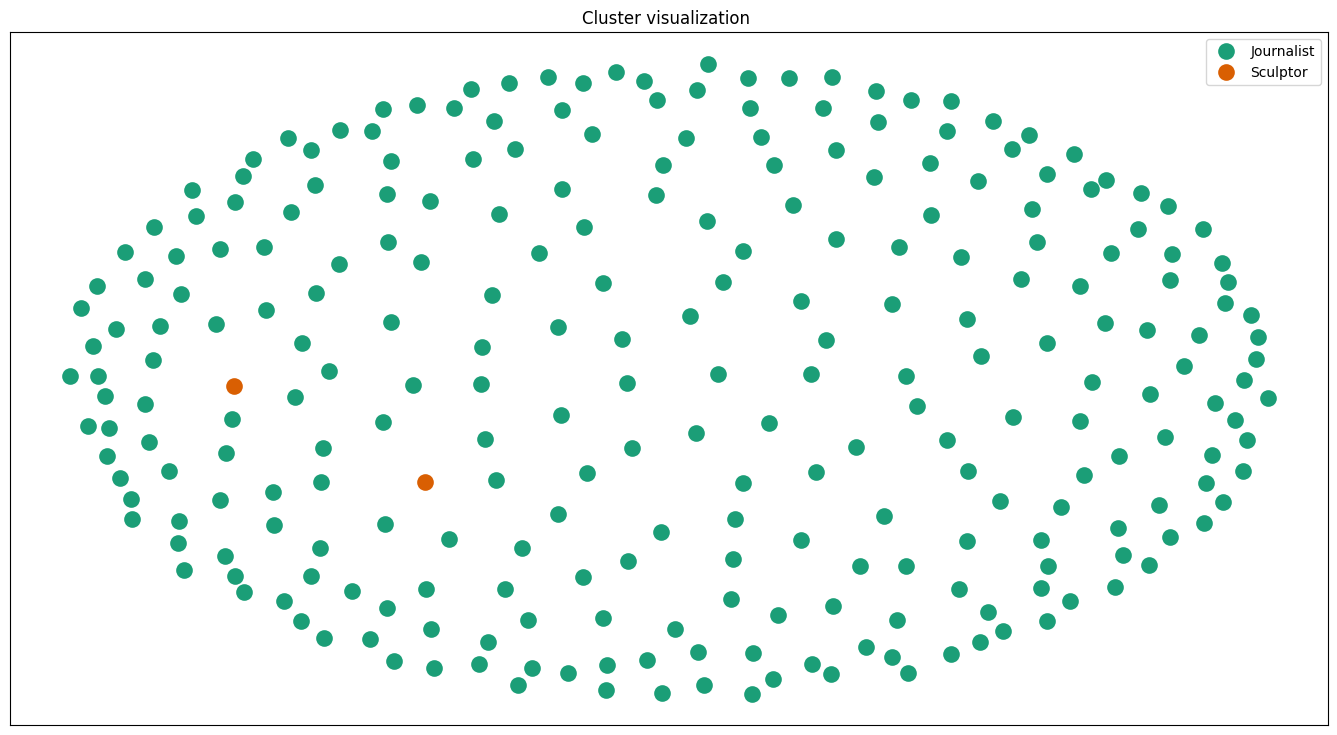

In [218]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(tfidf_matrix)

# Use multidimensional scaling to convert the dist matrix into a 2-dimensional array
MDS()

# n_components=2 to plot results in a two-dimensional plane
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

#set up colors per clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02'}

#set up cluster names
cluster_names = {0: 'Journalist', 1: 'Sculptor'}

#create data frame that has the result of the MDS plus the cluster numbers and titles

df = pd.DataFrame(dict(x=xs, y=ys, label=agg_clust.labels_.tolist()))

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9))
ax.margins(0.05)

#iterate through groups to layer the plot
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12,
            label=cluster_names[name],
            color=cluster_colors[name],
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',
        which='both',
        left=False,
        top=False,
        labelleft=False)

ax.legend(numpoints=1)
plt.title('Cluster visualization ')
plt.show()